### Contents
Introducing the BCE Loss Function<br>
The BCE Loss Function with a Scalar<br>
Visualizing the BCE Loss Function<br>
The BCE Loss Function with a Vector<br>
Breaking the BCE Loss Function<br>

In [1]:
import math

import torch
from torch import nn
import torch.nn.functional as F
from torch import Tensor
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def plot_data(x: np.ndarray, y1: np.ndarray, y2: np.ndarray=None) -> None:
    ax = plt.subplots()[1]
    ax.set_xlim(x.min(), x.max())
    ax.set_ylim(y1.min(), y1.max())
    plt.scatter(x, y1, color='blue')
    if not y2 is None:
        ax.scatter(x, y2, color='red')
    plt.grid(True)
    plt.axhline(color='black')
    plt.axvline(color='black')

The log of some number x is the exponent by which some other number known as the base must be raised to get the number x

In [3]:

x = 100
base = 10
print(math.log(x, base))

2.0


In [4]:
print("Euler's number:", math.e)
print(math.log(x))
print(math.log(x, math.e))

Euler's number: 2.718281828459045
4.605170185988092
4.605170185988092


In [5]:
x = torch.tensor(100)
print(torch.log(x))

tensor(4.6052)


### Introducing the BCE Loss Function

In [6]:
# Sample implementation for descriptive purposes.
def my_bce_loss(prediction: Tensor, target: Tensor) -> Tensor:
    a = target * torch.log(prediction)
    b = (1 - target) * (torch.log(1 - prediction))
    return -(a+b).mean()

prediction = torch.tensor(.01, dtype=torch.float32)
target = torch.tensor(1, dtype=torch.float32)
print(prediction)
print(target)

# My loss function
loss = my_bce_loss(prediction, target)
print(loss)

# This is the loss class that Pytorch provides.
bce_loss = nn.BCELoss()
loss = bce_loss(prediction, target)
print(loss)

# This is the loss function Pytorch provides.
loss = F.binary_cross_entropy(prediction, target)
print(loss)

tensor(0.0100)
tensor(1.)
tensor(4.6052)
tensor(4.6052)
tensor(4.6052)


### Visualizing the BCE Loss Function

In [7]:
# If you use float16 you get a weird error from the loss function because the BCE function has
# not implemented the float16 data type.
#predictions = [torch.tensor(p/100, dtype=torch.float32) for p in range(1, 101)]
#target = torch.tensor(1, dtype=torch.float32)

predictions = [torch.tensor(p/100, dtype=torch.float32) for p in range(0, 100)]
target = torch.tensor(0, dtype=torch.float32)

weight = torch.tensor(1, dtype=torch.int32)

display_predictions = [p.item() for p in predictions]
print(display_predictions)

[0.0, 0.009999999776482582, 0.019999999552965164, 0.029999999329447746, 0.03999999910593033, 0.05000000074505806, 0.05999999865889549, 0.07000000029802322, 0.07999999821186066, 0.09000000357627869, 0.10000000149011612, 0.10999999940395355, 0.11999999731779099, 0.12999999523162842, 0.14000000059604645, 0.15000000596046448, 0.1599999964237213, 0.17000000178813934, 0.18000000715255737, 0.1899999976158142, 0.20000000298023224, 0.20999999344348907, 0.2199999988079071, 0.23000000417232513, 0.23999999463558197, 0.25, 0.25999999046325684, 0.27000001072883606, 0.2800000011920929, 0.28999999165534973, 0.30000001192092896, 0.3100000023841858, 0.3199999928474426, 0.33000001311302185, 0.3400000035762787, 0.3499999940395355, 0.36000001430511475, 0.3700000047683716, 0.3799999952316284, 0.38999998569488525, 0.4000000059604645, 0.4099999964237213, 0.41999998688697815, 0.4300000071525574, 0.4399999976158142, 0.44999998807907104, 0.46000000834465027, 0.4699999988079071, 0.47999998927116394, 0.49000000953

In [8]:
losses = [F.binary_cross_entropy(p, target, weight) for p in predictions]

display_losses = [l.item() for l in losses]
print(display_losses)

[0.0, 0.010050326585769653, 0.02020268701016903, 0.030459178611636162, 0.040822017937898636, 0.051293306052684784, 0.06187540665268898, 0.07257068157196045, 0.08338159322738647, 0.0943107157945633, 0.10536054521799088, 0.11653383076190948, 0.12783338129520416, 0.13926206529140472, 0.15082287788391113, 0.16251890361309052, 0.17435334622859955, 0.18632960319519043, 0.1984509527683258, 0.21072103083133698, 0.2231435328722, 0.23572230339050293, 0.24846139550209045, 0.26136478781700134, 0.2744368612766266, 0.28768208622932434, 0.3011050820350647, 0.31471070647239685, 0.3285040259361267, 0.3424902558326721, 0.3566749691963196, 0.3710636794567108, 0.3856624662876129, 0.4004776179790497, 0.4155154824256897, 0.4307829439640045, 0.4462871253490448, 0.46203547716140747, 0.4780358076095581, 0.4942963123321533, 0.5108255743980408, 0.5276327133178711, 0.544727087020874, 0.5621189475059509, 0.5798184871673584, 0.597836971282959, 0.6161862015724182, 0.6348783373832703, 0.6539264917373657, 0.6733445525

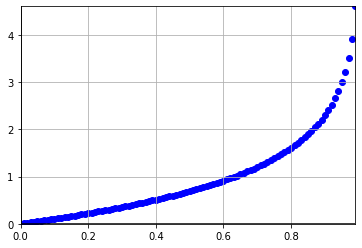

In [9]:
plot_data(np.array(predictions), np.array(losses))